## ML 1 In-Class

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UVADS/DS-3001/blob/main/04_ML_Concepts_I_Foundations/ML1_inclass.ipynb#scrollTo=9723a7ee)

In [3]:
# import packages

#from pydataset import data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [4]:
url = "https://datahub.io/machine-learning/iris/r/iris.csv"

iris=pd.read_csv(url)
#iris = data('iris')
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


What mental models can we see from these data sets? What data science questions can we ask? 

### Example: k-Nearest Neighbors

We want to first split the data into train and test data sets. To do this, we will use sklearn's train_test_split method.

First, we need to separate variables into independent and dependent dataframes.

In [5]:
X = iris.drop(['class'], axis=1).values   # independent variables
y = iris['class'].values                  # dependent variable

train, test = train_test_split(iris,  test_size=0.3, stratify = iris['class']) 

In [6]:
train.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,105.000000,105.000000,105.000000,105.000000
mean,5.790476,3.009524,3.722857,1.180952
std,0.837983,0.435343,1.759712,0.749884
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.700000,1.600000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.300000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
test, validation = train_test_split(test, test_size=0.5, stratify=test['class'])

In [8]:
test.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,22.000000,22.000000,22.000000,22.000000
mean,5.977273,3.168182,3.886364,1.209091
std,0.789172,0.450805,1.829206,0.784923
min,4.700000,2.500000,1.200000,0.200000
25%,5.325000,2.925000,1.500000,0.200000
50%,5.950000,3.100000,4.500000,1.450000
75%,6.575000,3.400000,5.350000,1.775000
max,7.300000,4.200000,6.300000,2.500000


Now, we use the scikitlearn KNN classifier.

In [9]:
validation.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,23.000000,23.000000,23.000000,23.000000
mean,5.956522,3.147826,3.800000,1.269565
std,0.827826,0.389486,1.796714,0.831447
min,4.600000,2.500000,1.300000,0.100000
25%,5.300000,3.000000,1.600000,0.350000
50%,5.900000,3.100000,4.700000,1.400000
75%,6.550000,3.250000,5.150000,2.000000
max,7.700000,4.100000,6.700000,2.300000


In [10]:
neigh = KNeighborsClassifier(n_neighbors=10)

X_train = train.drop(['class'], axis=1).values # values
y_train = train['class'].values # labels

neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [11]:
# now, we check the model's accuracy:

X_test = test.drop(['class'], axis=1).values
y_test = test['class'].values

a = neigh.predict(X_test)

print("Predicted label Versicolor =",(a == 'Iris-versicolor').sum())
print("Predicted label Virginica =", (a == 'Iris-virginica').sum())
print("Predicted label Setosa =", (a == 'Iris-setosa').sum())

Predicted label Versicolor = 9
Predicted label Virginica = 6
Predicted label Setosa = 7


In [33]:
print("True Label Versicolor =",(y_test == 'Iris-versicolor').sum())
print("True Label Virginica =", (y_test == 'Iris-virginica').sum())
print("True Label Setosa =", (y_test == 'Iris-setosa').sum())

True Label Versicolor = 7
True Label Virginica = 7
True Label Setosa = 8


In [12]:
import sklearn


sklearn.metrics.confusion_matrix(y_test, a,labels=['Iris-versicolor','Iris-virginica','Iris-setosa'], sample_weight=None, normalize=None)

array([[8, 0, 0],
       [1, 6, 0],
       [0, 0, 7]], dtype=int64)

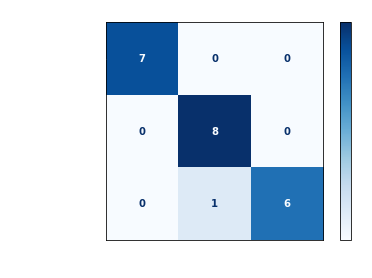

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(neigh, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

#credit: https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/

### Patterns in data

Look at the following tables: do you see any patterns? How could a classification model point these out?

In [35]:
patterns = iris.groupby(['class'])
patterns['sepallength'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
Iris-versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
Iris-virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [36]:
patterns['sepalwidth'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [37]:
patterns['petallength'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [65]:

fig = px.scatter_3d(iris, x = 'sepallength', 
                     y = 'petallength', z='petalwidth', color = 'class')

fig

#fig.show(renderer='browser')

### Mild disclaimer --
*Do not worry about understanding the machine learning in this example!* We go over kNN models at length later in the course; you do not need to understand exactly what the model is doing quite yet. For now, ask yourself:

1. What is the purpose of data splitting?
2. What can we learn from data testing/validation?
3. How do we know if a model is working?
4. How could we find the model error?

If you want, try changing the size of the test data or the number of n_neighbors and see what changes!